<b> <h2>Analyse Data from Housing District to predict housing price based on property features</h2> </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
names = ['Longitude', 'lattitude', 'median age', 'total rooms', 'total bedrooms', 'population', 'households', 'median income', 'median house value', 'ocean proximity']
housing = pd.read_csv('cal_housing.data', header = None, names=names)

In [3]:
housing.head() #each row represents one district with 10 attributes 

,Longitude,lattitude,median age,total rooms,total bedrooms,population,households,median income,median house value,ocean proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NaN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NaN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NaN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NaN
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NaN


In [4]:
housing.info() # summarises morphology  
"""note in the book there should be 207 null/ missing data bedroom values  as teaching lesson for dealing with missing data but i downloaded 
full dataset. I'll just a separate notebook for handling missing data"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
Longitude             20640 non-null float64
lattitude             20640 non-null float64
median age            20640 non-null float64
total rooms           20640 non-null float64
total bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median income         20640 non-null float64
median house value    20640 non-null float64
ocean proximity       0 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


"note in the book there should be 207 null/ missing data bedroom values  as teaching lesson for dealing with missing data but i downloaded \nfull dataset. I'll just a separate notebook for handling missing data"

In [5]:
housing["ocean proximity"].value_counts()  ## determine the unique values in ocean column, for some reason its all NaN (not a number)

Series([], Name: ocean proximity, dtype: int64)

In [6]:
#since all of ocean is missing then omit ocean column
housing2 = housing.dropna(axis =1, how='all') 
# axis=1 (columns), axis=0 (row) , how = 'all' or any
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
Longitude             20640 non-null float64
lattitude             20640 non-null float64
median age            20640 non-null float64
total rooms           20640 non-null float64
total bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median income         20640 non-null float64
median house value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
#Summary of numerical data
housing2.describe()
#shows mean, max, min, count (non-null values), percentiles
#so .head, .info and .describe are great ways to get an idea of the data

,Longitude,lattitude,median age,total rooms,total bedrooms,population,households,median income,median house value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show>

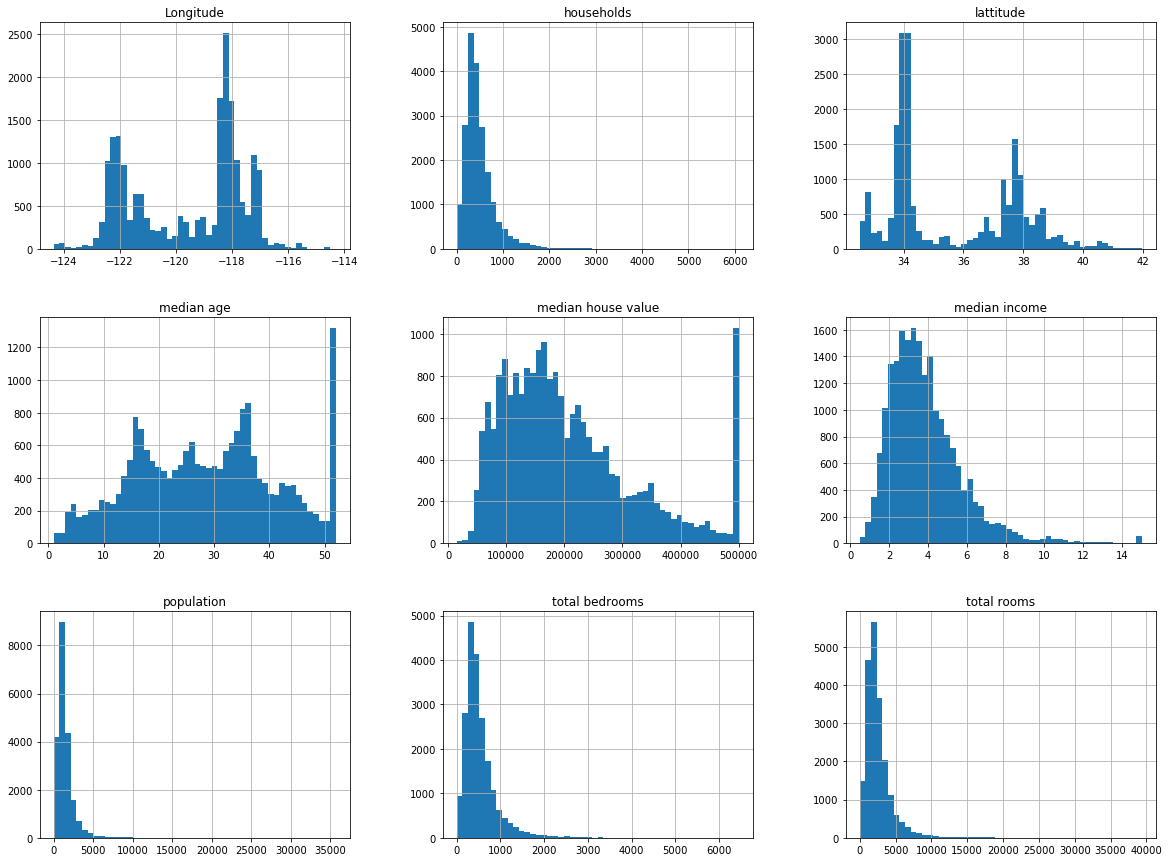

In [8]:
#Plot a histogram as well to visualise each instance vs individual attribute
%matplotlib inline
housing2.hist(bins=50, figsize=(20,15))
plt.show

#Histogram for Each Attribute

<b> Observations from Histogram </b>
1.  Median income has been scaled and capped (maxed) at 15 
2. Median housing value (the target) is capped at $500,000 so if left as is the model will not learn prices beyond that limit
    i. may have to get the proper labels from the original dataset
    ii.  just remove all the instances with thos labeles
3. Attributes have vastly different scale--> feature scaling (15- 500,000)
4. Some the histograms are highly skewed (tail-heavy) which can pose an issue for ML so will have transform them into more bell-shaped.



In [9]:
#Creating a Test Set
from sklearn.model_selection import train_test_split as tts
trainset, testset = tts(housing2, test_size = 0.2, random_state =42)

#a similar train-test split function from scratch

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  #an array of random indices from 0 to lendata-1
    testset_size = int(len(data)* test_ratio)
    test_indices = shuffled_indices[:testset_size] #shuffled for random indexes to slice data from
    train_indices =  shuffled_indices[testset_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing2, 0.2)
print(len(train_set), 'train  + ' , len(test_set), 'test')

 

16512 train  +  4128 test


Median Income was told be an important factor to determine pricing so I want
to ensure that thet test data contains all range/categories of income values that are present in the dataset to avoid Sampling Bias.
Stratified Sampling will be used



In [10]:
housing2["income_cat"] = np.ceil(housing2["median income"]/1.5)  
#divides the income into categories
housing2["income_cat"].where(housing2["income_cat"]< 5, 5.0, inplace= True)
#merges all categories greater than 5 as 5 



In [12]:
"""Aim: To stratify the testset so that it reflects each income category in the
same ratio found in the original data"""
from sklearn.model_selection import StratifiedShuffleSplit as stratsplit
split = stratsplit(n_splits =1, test_size=0.2, random_state = 42)

for train_index, test_index in split.split(housing2, housing2["income_cat"]):
    strat_train_set = housing2.loc[train_index] #why loc and not iloc
    strat_test_set = housing2.loc[test_index]

    #see the proportion of each category in income 
housing2["income_cat"].value_counts() / len(housing2)*100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64

In [13]:
#Remove the income_cat attribute to restore orginal state of data
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

<h4> Visualisation The Data </h4>

'Cleary shaped like the state of california'

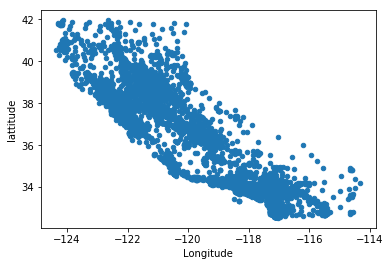

In [14]:
#visualise the geography of the district
housing2.plot(kind="scatter", x="Longitude", y="lattitude") 
#ensure names in column and plot match i made a spelling error and it wudnt run

'Cleary shaped like the state of california'

'Bay area and Southern California (LA region) have the highest denisties as expected'

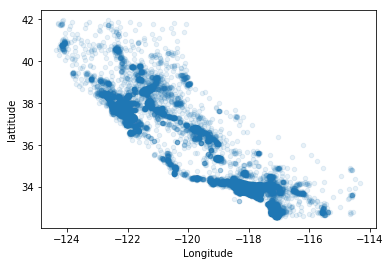

In [15]:
housing2.plot(kind="scatter", x="Longitude", y="lattitude", alpha=0.1) #to better visualise high-denisty area

'Bay area and Southern California (LA region) have the highest denisties as expected'

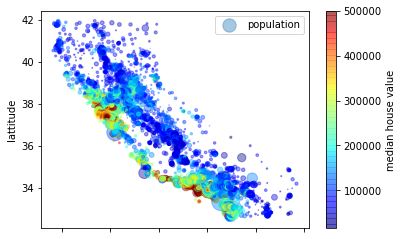

In [16]:
#Look at housing prices
#radius of each circle represents districts population (option s), color --> price (option c)

housing2.plot(kind = 'scatter', x ='Longitude', y='lattitude', alpha=0.4, s=housing2["population"]/100, label = 'population', 
             c= 'median house value', cmap=plt.get_cmap('jet'), colorbar=True)  #cmap jet blue (low)  to red (high)
plt.legend()

Based on the map: Location does affect price as we see brighter on bay area and south bay area

In [17]:
#Run Pearson's correlation to investigate correlation between every pair of attribute

corr_matrix = housing2.corr()
'How much each attribute correlate with median house value'
corr_matrix["median house value"].sort_values(ascending= False)


"Higher income means that can afford a more expensive house. "

'Higher income means that can afford a more expensive house. '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FAFC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A2B1278>]], dtype=object)

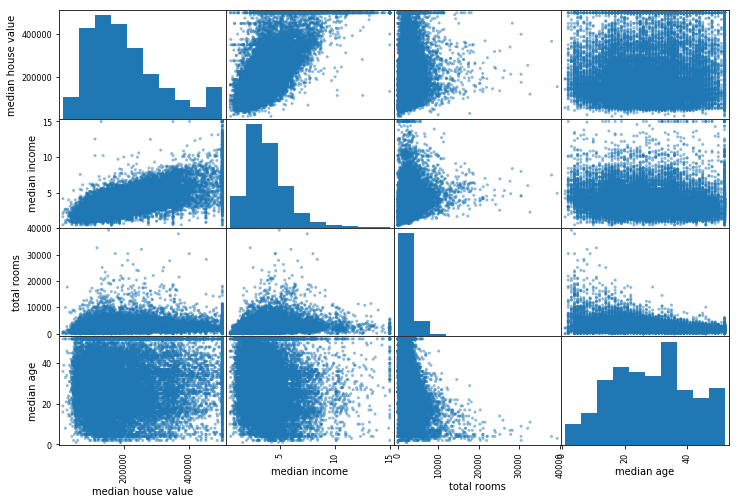

In [18]:
# Pandas scatterplot matrix function..cant do for all cuz it'll take up too  much space so i'll run 
#attributes I think are relevant

from pandas.plotting import scatter_matrix

attributes = ["median house value", 'median income', 'total rooms', 'median age']
scatter_matrix(housing2[attributes], figsize = (12, 8))

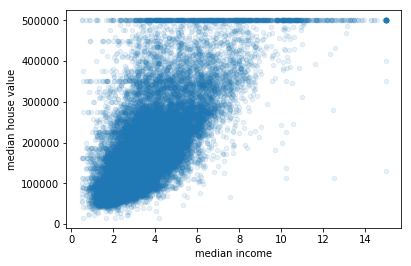

In [19]:
housing2.plot(kind='scatter', x='median income',  y= 'median house value', alpha=0.1)

In [20]:
"""Clean-Up
from the plot:  straight-line pattern at $450,000 $280,000 and 350,000 and 500,000.Those should be removed
before machine learning
also clean up the tail heavy distributions and add more useful attributes like number of rooms, number of households""


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-20-a05c50722b28>, line 4)

In [ ]:
housing2["rooms per household"] = housing2["total rooms"]/housing2["households"]
housing2[ "bedrooms per room"] = housing2['total bedrooms']/housing2["total rooms"]
housing2['population per household'] = housing2["population"]/housing2["households"]

corr_matrix = housing2.corr()
corr_matrix["median house value"].sort_values(ascending=False)

rooms per household is more correlated than total rooms and total bedrooms aha!

<b> Preprocessing: Prepare teh Data for Machine Learning</b>

to care of missing values use scikitlearn Imputer module which replaces each missing value with the median or mean or mode. Works with numerical data, I just dropped the whole column cuz too many mising values so i only have numerical data

In [52]:
"""Before cleaning data lets revert to a clean training set and separate the predictors
from the target label"""

housing2 = strat_train_set.drop("median house value", axis=1)
housing2_labels = strat_train_set["median house value"].copy()

In [53]:

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy ='median')
imputer.fit(housing2) #computes median for all attributes 
imputer.statistics_  #imputer stores the median of each variable in an array instance statistics



array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [54]:
housing2.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [55]:
#replaces missing values with median with the now trained imputer
X= imputer.transform(housing2)

<b> Data Transformations and Feature Scaling </b>

<p> <i> Min-Max Scaling </i> aka Normalisation  
        x-min/ (max-min)  
<i> Standardisation </i>  ( the one I'm used )  
        x-mean/s.d. </p>



In [40]:
#Sci Kit Transformation Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler),
    ])


NameError: name 'CombinedAttributesAdder' is not defined

In [57]:
"""Too fucking complex rn. I'm gonna just do a standardisation transformation should be good enough
#should I also tranform the target array median house value? I will"""

housing2_std = np.copy(housing2)
len(housing2_std[0])  ##len of first row is # of columns aka # num of features


8

In [58]:
for x in range(len(housing2_std[0])):
    housing2_std[:,x] = (housing2_std[:,x]- housing2_std[:,x].mean())/housing2_std[:,x].std()
    x+=1

<b> Eureka Moment!!!</b>  
At first, even with the perceptron earlier, I couldn't get my vectorised
implementation of standardisation to run, which was 
<p> <b> for i in len(housing2_std[0]):   #same as above </b> </p>
I learnt however that the for method requires an iterable where as len(housing_std[0]) returns only an integer hence why I had to use a range function





In [85]:
#cleanup and standardisation  function my own for future use:fucking genius

def standardise (data):
    
    """from sklearn.preprocessing import Imputer

    imputer = Imputer(strategy ='median')
    imputer.fit(data) #computes median for all attributes 
    imputer.statistics_  #imputer stores the median of each variable in an array instance statistics
    X= imputer.transform(data)
    
    from sklearn.model_selection import train_test_split as tts
    trainset, testset = tts(data, test_size = 0.2, random_state =42)

    #from sklearn.model_selection import StratifiedShuffleSplit as stratsplit
    #split = stratsplit(n_splits =1, test_size=0.2, random_state = 42)"""
    
    data_std = np.copy(data)
    
    for x in range(len(data_std)):
        data_std[:,x] = (data_std[:,x]- data_std[:,x].mean())/data_std[:,x].std()
        x+=1
    return data_std


In [67]:
#Selecting and Training A Model...finally ffs its been 2 days
labels = np.copy(housing2_labels) #linear regression works with arrays/matrix

from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(housing2_std,housing2_labels)  #accepts X, y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
print( labels.shape, housing2_std.shape)

(16512,) (16512, 8)


In [70]:
#Print estimated intercept and number of coefficients
#Coefficent measures how the y would increase with a certain feature if all other features were held constant

print('Estimated intercept coefficient : ', lin_reg.intercept_)


Estimated intercept coefficient :  206990.920724


In [71]:
print('Number of coeffients : ',  len(lin_reg.coef_))

Number of coeffients :  8


In [73]:
housing2_std_df = pd.DataFrame(housing2_std)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [76]:
#Viualise the features and their estimated coefficients using a dataframaaa
coefs = zip(housing2.columns, lin_reg.coef_)

In [78]:
pd.DataFrame(list(coefs), columns = ['features', 'estimated coefficient'])

"pandas doesnt accept an iterator like zip as anrguement so make as list first"

,features,estimated coefficient
0,Longitude,-85476.274454
1,lattitude,-90686.266842
2,median age,14944.123584
3,total rooms,-17663.127219
4,total bedrooms,48624.018598
5,population,-42816.657404
6,households,16855.230937
7,median income,76644.197015


So it shows the strongest correlation is median income and then total bedrooms

<function matplotlib.pyplot.show>

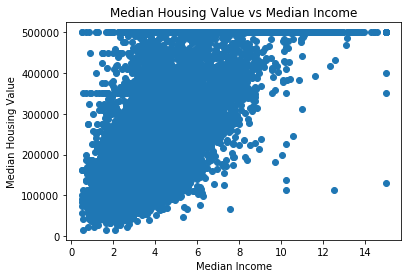

In [82]:
#scatter plot between median income and median housing value

plt.scatter(housing2['median income'], housing2_labels)
plt.xlabel("Median Income")
plt.ylabel('Median Housing Value')
plt.title('Median Housing Value vs Median Income')
plt.show

In [103]:
#test our linear regression model on some instances from the training set

some_data = housing2_std[:5]
some_labels = housing2_labels.iloc[:5]
some_data_std = standardise(some_data)


In [104]:
print("Predictions :\t", lin_reg.predict(some_data_std))

Predictions :	 [ 192332.85400682  304582.27652573  209945.62237827   54327.11152318
  155666.96493646]


In [90]:
print("Labels :\t\t", list(some_labels))

Labels :		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


My model's predictions are soooo far off fromt the actual labels--> correction i shud've used the standardised values not unprocessed one. So lesson be consistent. Still far off tho by round 50%

In [101]:
#run rmse aka cost fucntion 

from sklearn.metrics import mean_squared_error
housing2_pred = lin_reg.predict(housing2_std)
lin_mse = mean_squared_error(housing2_labels, housing2_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69807.398327849005

okay.... the value is close to the textbook (68628.4), actually more accurate than the textbook cuz a better value between 120k-250k. So much for their fancy pantsy transformation pipeline

In [105]:
#Training a Decision Tree Regressor capable fo finding complex non-linear relationship (maybe like age and number of BM HSC?)

from sklearn.tree import DecisionTreeRegressor

tree_reg =  DecisionTreeRegressor()
tree_reg.fit(housing2_std, housing2_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [106]:
#Evaluate the model
housing2_pred =  tree_reg.predict(housing2_std)
tree_mse = mean_squared_error( housing2_labels, housing2_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

0.0

This is not a perfect so it must mean that this model is well <b>overfit</b> so we'll move on to cross validation using K-Fold Cross ValIDATION   
<b> Cross-Validation </b> provides an estimate of the performance of a model and how precise this estimate is in form a standard deviation 

In [112]:
from sklearn.model_selection import cross_val_score as cross

scores = cross(tree_reg, housing2_std, housing2_labels, scoring = "neg_mean_squared_error", cv=10) #evaluate teh tree 10 times
tree_rmse_scores = np.sqrt(-scores)  #negative score because scoring function where greater is better is opposite of mse (less is better)


In [116]:
def display_scores(scores):
    print ("Scores ", scores)
    print ("Mean ", scores.mean())
    print ("Standard deviation " , scores.std())


In [117]:
display_scores(tree_rmse_scores)

Scores  [ 68027.92072624  67920.73316466  71722.8542852   69776.48243468
  72120.34372886  73499.74127479  70718.62558763  69489.34685886
  70398.4303436   71856.42809657]
Mean  70553.0906501
Standard deviation  1711.66145757


In [118]:
#Cross validate liner regression model and compare to decsiion tree 
lin_scores = cross(lin_reg, housing2_std, housing2_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores  [ 68043.51765006  68284.15441196  69469.89701115  74742.11025249
  68426.83754077  72016.79763077  66380.06972655  69731.64051837
  73516.75228607  68847.52479088]
Mean  69945.9301819
Standard deviation  2508.49164226


Linear regression (70000+/2508 ~ 68500to725000) performed slightly better than the decision tree (71000+/- 1711 ~ 69000-72000) beause the maximum score was closer to 12000???